## GDP at Base Prices, By Industry, Provinces and Territories, Contribution to National Percentage Change.

[Open Data Set Found Here](https://open.canada.ca/data/en/dataset/630d3395-fb77-44ef-80c6-fae214886a7b)

In [49]:
# Dependencies.
import pandas as pd
import matplotlib.pyplot as plt

# Style.
from matplotlib import style
style.use('fivethirtyeight')

In [38]:
# Data.
df = pd.read_csv('../resources/01/36100658.csv')
df.head()

,REF_DATE,GEO,DGUID,Value,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017,Newfoundland and Labrador,2016A000210,Contributions to national percentage change,All industries [T001],Percentage point,396,units,0,v1271959864,1.1.1,0.020,NaN,NaN,NaN,3
1,2017,Newfoundland and Labrador,2016A000210,Contributions to national percentage change,Goods-producing industries [T002],Percentage point,396,units,0,v1271959865,1.1.2,0.013,NaN,NaN,NaN,3
2,2017,Newfoundland and Labrador,2016A000210,Contributions to national percentage change,Service-producing industries [T003],Percentage point,396,units,0,v1271959866,1.1.3,0.006,NaN,NaN,NaN,3
3,2017,Newfoundland and Labrador,2016A000210,Contributions to national percentage change,Industrial production [T010],Percentage point,396,units,0,v1271959919,1.1.56,0.029,NaN,NaN,NaN,3
4,2017,Newfoundland and Labrador,2016A000210,Contributions to national percentage change,Information and communication technology secto...,Percentage point,396,units,0,v1271959921,1.1.58,0.002,NaN,NaN,NaN,3


In [39]:
# Unique count.
df.nunique()

REF_DATE                                                   4
GEO                                                       13
DGUID                                                     13
Value                                                      1
North American Industry Classification System (NAICS)     58
UOM                                                        1
UOM_ID                                                     1
SCALAR_FACTOR                                              1
SCALAR_ID                                                  1
VECTOR                                                   754
COORDINATE                                               754
VALUE                                                    259
STATUS                                                     0
SYMBOL                                                     0
TERMINATED                                                 0
DECIMALS                                                   1
dtype: int64

In [40]:
# Drop columns.
df = df.drop(columns=[col for col in df.columns if df[col].nunique() < 2])
df.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),VECTOR,COORDINATE,VALUE
0,2017,Newfoundland and Labrador,2016A000210,All industries [T001],v1271959864,1.1.1,0.020
1,2017,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,0.013
2,2017,Newfoundland and Labrador,2016A000210,Service-producing industries [T003],v1271959866,1.1.3,0.006
3,2017,Newfoundland and Labrador,2016A000210,Industrial production [T010],v1271959919,1.1.56,0.029
4,2017,Newfoundland and Labrador,2016A000210,Information and communication technology secto...,v1271959921,1.1.58,0.002


In [41]:
# Check GEO corresponds to DGUID.
[value for value in df['GEO'].unique() if len(df[df['GEO'] == value]['DGUID'].unique()) > 1]

[]

In [42]:
# Check COORDINATE values.
df[df['COORDINATE'] == '1.1.2']
# Covered by NAICS column.

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),VECTOR,COORDINATE,VALUE
1,2017,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,0.013
755,2018,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,-0.053
1509,2019,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,0.041
2263,2020,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,-0.028


In [43]:
# Check VECTOR values.
df[df['VECTOR'] == 'v1271959865']
# Covered by NAICS column.

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),VECTOR,COORDINATE,VALUE
1,2017,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,0.013
755,2018,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,-0.053
1509,2019,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,0.041
2263,2020,Newfoundland and Labrador,2016A000210,Goods-producing industries [T002],v1271959865,1.1.2,-0.028


In [44]:
# Drop further columns.
df = df.drop(columns=['DGUID', 'COORDINATE', 'VECTOR'])
df.head()

,REF_DATE,GEO,North American Industry Classification System (NAICS),VALUE
0,2017,Newfoundland and Labrador,All industries [T001],0.020
1,2017,Newfoundland and Labrador,Goods-producing industries [T002],0.013
2,2017,Newfoundland and Labrador,Service-producing industries [T003],0.006
3,2017,Newfoundland and Labrador,Industrial production [T010],0.029
4,2017,Newfoundland and Labrador,Information and communication technology secto...,0.002


In [45]:
# Change column names.
df.columns = ['Year', 'Location', 'NAICS', 'Value']
df.head()

,Year,Location,NAICS,Value
0,2017,Newfoundland and Labrador,All industries [T001],0.020
1,2017,Newfoundland and Labrador,Goods-producing industries [T002],0.013
2,2017,Newfoundland and Labrador,Service-producing industries [T003],0.006
3,2017,Newfoundland and Labrador,Industrial production [T010],0.029
4,2017,Newfoundland and Labrador,Information and communication technology secto...,0.002


In [46]:
# Produce pivot table.
df_p = df.pivot(['Location', 'NAICS'], 'Year', 'Value')
df_p

Year                                                          2017   2018  \
Location NAICS                                                              
Alberta  Accommodation and food services [72]                0.002 -0.001   
         Administrative and support, waste management an... -0.019  0.005   
         Agriculture, forestry, fishing and hunting [11]     0.007 -0.017   
         All industries [T001]                               0.669  0.322   
         Animal production and aquaculture [112]             0.002  0.000   
...                                                            ...    ...   
Yukon    Transportation and warehousing [48-49]              0.000  0.000   
         Transportation equipment manufacturing [336]        0.000  0.000   
         Utilities [22]                                      0.000  0.000   
         Wholesale trade [41]                                0.000  0.000   
         Wood product manufacturing [321]                    0.000  0.000   

Year                                                          2019   2020  
Location NAICS                                                             
Alberta  Accommodation and food services [72]                0.010 -0.103  
         Administrative and support, waste management an...  0.001 -0.065  
         Agriculture, forestry, fishing and hunting [11]     0.021  0.022  
         All industries [T001]                              -0.018 -1.214  
         Animal production and aquaculture [112]             0.002  0.000  
...                                                            ...    ...  
Yukon    Transportation and warehousing [48-49]              0.000 -0.001  
         Transportation equipment manufacturing [336]        0.000  0.000  
         Utilities [22]                                      0.000  0.000  
         Wholesale trade [41]                                0.000  0.000  
         Wood product manufacturing [321]                    0.000  0.000  

[754 rows x 4 columns]

In [47]:
# Explore other pivot tables.
df_p2 = df.pivot(['Year', 'NAICS'], 'Location', 'Value')
df_p2

Location                                                 Alberta  \
Year NAICS                                                         
2017 Accommodation and food services [72]                  0.002   
     Administrative and support, waste management an...   -0.019   
     Agriculture, forestry, fishing and hunting [11]       0.007   
     All industries [T001]                                 0.669   
     Animal production and aquaculture [112]               0.002   
...                                                          ...   
2020 Transportation and warehousing [48-49]               -0.144   
     Transportation equipment manufacturing [336]          0.000   
     Utilities [22]                                       -0.010   
     Wholesale trade [41]                                 -0.044   
     Wood product manufacturing [321]                     -0.002   

Location                                                 British Columbia  \
Year NAICS                                                                  
2017 Accommodation and food services [72]                           0.009   
     Administrative and support, waste management an...            -0.002   
     Agriculture, forestry, fishing and hunting [11]                0.004   
     All industries [T001]                                          0.475   
     Animal production and aquaculture [112]                       -0.001   
...                                                                   ...   
2020 Transportation and warehousing [48-49]                        -0.171   
     Transportation equipment manufacturing [336]                  -0.005   
     Utilities [22]                                                 0.007   
     Wholesale trade [41]                                          -0.004   
     Wood product manufacturing [321]                              -0.013   

Location                                                 Manitoba  \
Year NAICS                                                          
2017 Accommodation and food services [72]                   0.002   
     Administrative and support, waste management an...     0.002   
     Agriculture, forestry, fishing and hunting [11]        0.026   
     All industries [T001]                                  0.110   
     Animal production and aquaculture [112]                0.000   
...                                                           ...   
2020 Transportation and warehousing [48-49]                -0.033   
     Transportation equipment manufacturing [336]          -0.012   
     Utilities [22]                                         0.005   
     Wholesale trade [41]                                   0.003   
     Wood product manufacturing [321]                       0.000   

Location                                                 New Brunswick  \
Year NAICS                                                               
2017 Accommodation and food services [72]                        0.000   
     Administrative and support, waste management an...         -0.004   
     Agriculture, forestry, fishing and hunting [11]             0.002   
     All industries [T001]                                       0.039   
     Animal production and aquaculture [112]                     0.000   
...                                                                ...   
2020 Transportation and warehousing [48-49]                     -0.007   
     Transportation equipment manufacturing [336]                0.000   
     Utilities [22]                                             -0.004   
     Wholesale trade [41]                                       -0.001   
     Wood product manufacturing [321]                           -0.001   

Location                                                 Newfoundland and Labrador  \
Year NAICS                                                                           
2017 Accommodation and food services [72]                                    0.0

In [48]:
# Using 'All industries [T001]' NAICS to create visualizations.
df_tot = df[df['NAICS'] == 'All industries [T001]']
df_tot = df_tot.pivot('Location', 'Year', 'Value')
df_tot.columns.name = None
df_tot.index.name = None
df_tot

,2017,2018,2019,2020
Alberta,0.669,0.322,-0.018,-1.214
British Columbia,0.475,0.489,0.400,-0.460
Manitoba,0.110,0.066,0.011,-0.146
New Brunswick,0.039,0.022,0.020,-0.050
Newfoundland and Labrador,0.020,-0.045,0.051,-0.077
Northwest Territories,0.008,0.003,-0.013,-0.022
Nova Scotia,0.041,0.034,0.057,-0.050
Nunavut,0.018,0.007,0.008,0.004
Ontario,1.068,1.305,0.777,-1.934
Prince Edward Island,0.014,0.005,0.014,-0.006


In [67]:
# Compare order each year.
order = []
for year in df_tot.columns:
    order.append(df_tot[year].sort_values(ascending=False).index.tolist())
pd.DataFrame(order).T
# COVID had great effect on the changing of the GDP - hence issues with 2020.

,0,1,2,3
0,Ontario,Ontario,Ontario,Yukon
1,Alberta,Quebec,Quebec,Nunavut
2,Quebec,British Columbia,British Columbia,Prince Edward Island
3,British Columbia,Alberta,Nova Scotia,Northwest Territories
4,Manitoba,Manitoba,Newfoundland and Labrador,New Brunswick
5,Saskatchewan,Saskatchewan,New Brunswick,Nova Scotia
6,Nova Scotia,Nova Scotia,Prince Edward Island,Newfoundland and Labrador
7,New Brunswick,New Brunswick,Manitoba,Manitoba
8,Newfoundland and Labrador,Nunavut,Nunavut,Saskatchewan
9,Nunavut,Prince Edward Island,Yukon,British Columbia


<AxesSubplot:title={'center':'Total Contribution to National GDP Change by Province for 2017-2020'}, ylabel='Percent'>

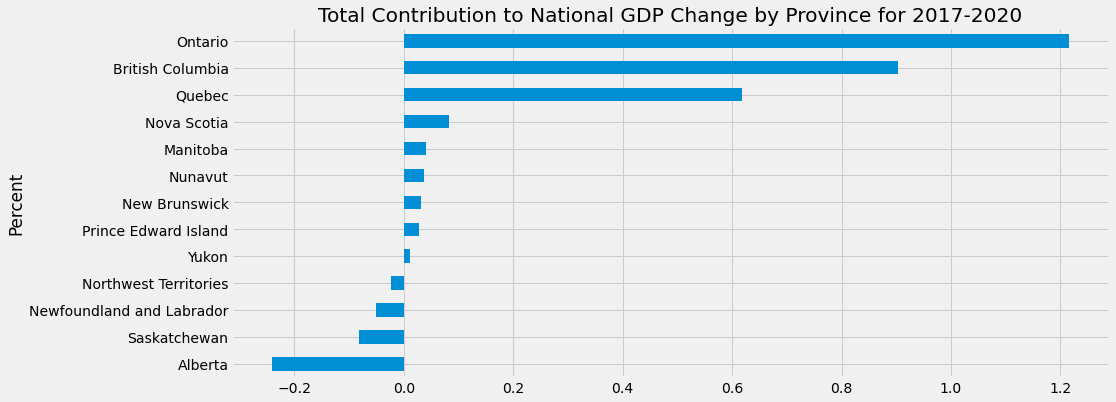

In [82]:
# Create graph to show total contribution to national GDP change by province for 2017-2020.
df_tot.sum(1).sort_values().plot.barh(figsize=(14,6),
                                     title='Total Contribution to National GDP Change by Province for 2017-2020',
                                     xlabel='Percent')

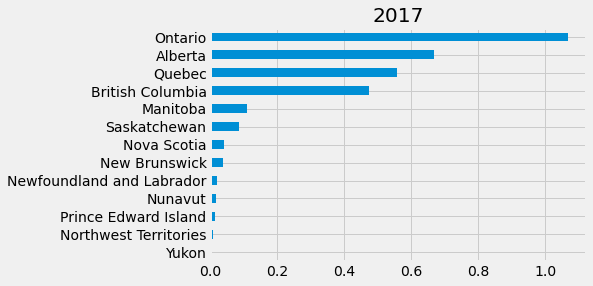

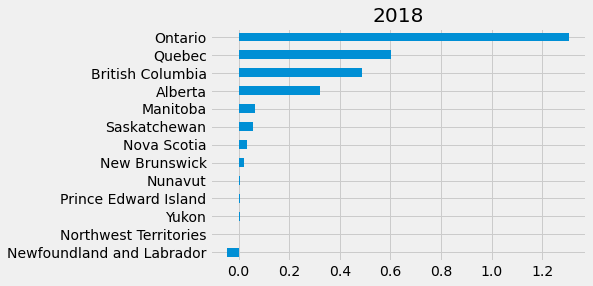

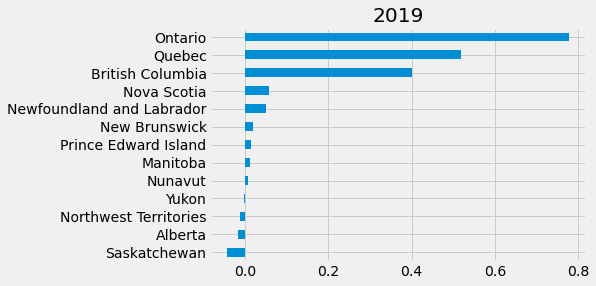

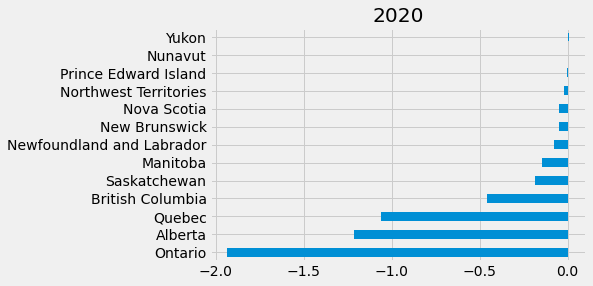

In [83]:
# Create individual graphs for each year.
for year in df_tot.columns:
    df_tot[year].sort_values().plot.barh(title=year)
    plt.show()